# Network Models

Epidemiological models on defined contact network.

All models are implemented in a Markov Chain Fashion (Next state $t+1$ only depend on current state $t$).

## SIR Model

States: Susceptible ($S$), Infected ($I$), Recovered ($R$)

$P_e:$ Exposure Probability

$T_r:$ Recovery time

\begin{equation}
\begin{split}
S \rightarrow^{P_e} I\\
I \rightarrow^{1/T_r} R\\
\end{split}
\end{equation}

## SEIR Model
States: Susceptible ($S$), Exposed ($I$), Infected ($I$), Recovered ($R$)

$P_e:$ Exposure Probability

$T_i:$ Incubation Period

$T_r:$ Recovery time


\begin{equation}
\begin{split}
S \rightarrow^{P_e} E\\
E \rightarrow^{1/T_i} I\\
I \rightarrow^{1/T_r} R\\
\end{split}
\end{equation}

In [5]:
from network_models import sir_network, seir_network

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import random

# TODO: must change models to jax + numpyro

def run_simulation(graph, model, num_sims=10, t_sim=300):
    df_sims = []
    for iter_i in tqdm(range(num_sims)):
        (df_graph, df_states) = model(graph, len(graph.nodes), t_sim, num_infected_init=None)
        df_states['sim_id'] = iter_i
        df_sims.append(df_states)
    df_all = pd.concat(df_sims)

    return (df_all, df_graph)

graph = nx.scale_free_graph(500).to_undirected()
pos = nx.spring_layout(graph, iterations=100) #,prog='twopi',args='')

# SIR Dynamics

100%|██████████| 10/10 [00:00<00:00, 16.05it/s]


<AxesSubplot:xlabel='index'>

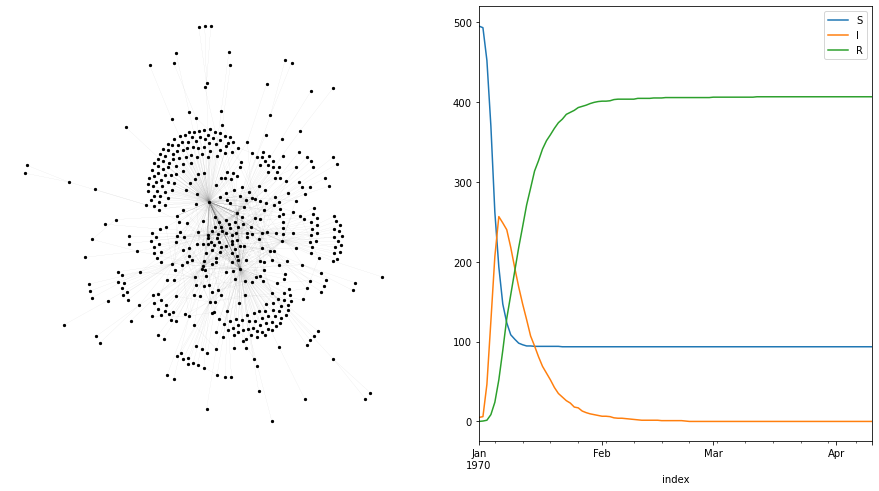

In [10]:

(df_dynamics_sir, df_graph_sir) = run_simulation(graph, sir_network, num_sims=10, t_sim=100)
fig, ax = plt.subplots(1,2, figsize=(15.5, 8))
nx.draw(ax = ax[0], G=graph, pos=pos,
        node_size=5,
        node_color= 'black',#'#e35340',
        edge_color='gray',
        width=.05,
        edge_cmap=plt.cm.Blues, with_labels=False)

df_sim1 = df_dynamics_sir.copy().reset_index()
df_sim1 = df_sim1.groupby(['index']).median()

df_sim1.plot(ax=ax[1], y='S')
df_sim1.plot(ax=ax[1], y='I')
df_sim1.plot(ax=ax[1], y='R')

100%|██████████| 10/10 [00:01<00:00,  9.72it/s]


<AxesSubplot:xlabel='index'>

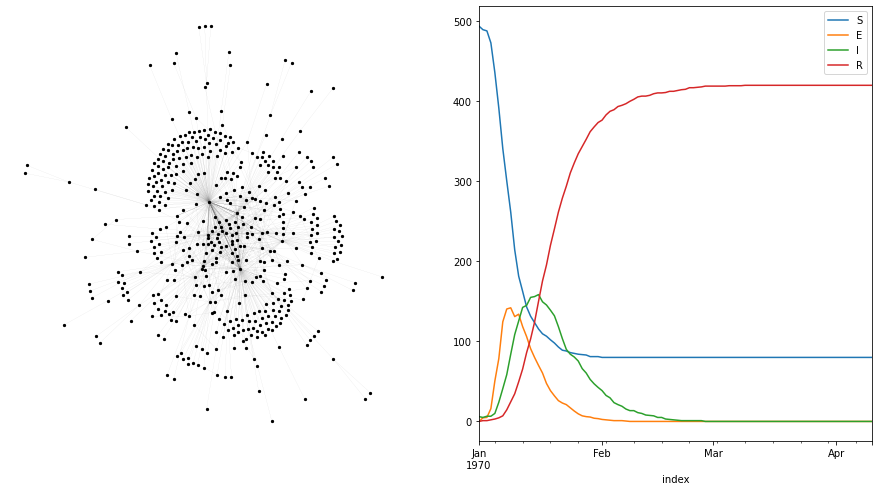

In [12]:
(df_dynamics_seir, df_graph_seir) = run_simulation(graph, seir_network, num_sims=10, t_sim=100)

fig, ax = plt.subplots(1,2, figsize=(15.5, 8))
nx.draw(ax = ax[0], G=graph, pos=pos,
        node_size=5,
        node_color= 'black',#'#e35340',
        edge_color='gray',
        width=.05,
        edge_cmap=plt.cm.Blues, with_labels=False)

df_sim1 = df_dynamics_seir.copy().reset_index()
df_sim1 = df_sim1.groupby(['index']).median()

df_sim1.plot(ax=ax[1], y='S')
df_sim1.plot(ax=ax[1], y='E')
df_sim1.plot(ax=ax[1], y='I')
df_sim1.plot(ax=ax[1], y='R')
